<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/NG_220421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: line 0: cd: MyDrive: No such file or directory


In [4]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('/content/drive/MyDrive/NG DATA.csv')
df.head()

,Unnamed: 0,211FC0127.SP,211PC0129.OP,211FC0128.OP,211FC0128,211FC0126.OP
0,2022-04-20 10:00,83500,23.435617,14.183225,13539.80957,13.749624
1,2022-04-20 10:01,83500,23.215958,14.182668,13430.05859,13.610147
2,2022-04-20 10:02,83500,23.102837,13.845316,12765.55664,13.794226
3,2022-04-20 10:03,83500,22.991348,13.686910,12413.68164,14.531040
4,2022-04-20 10:04,83500,22.989527,13.679918,12074.24316,14.730437


In [29]:
data = df.to_numpy()
data

array([['2022-04-20 10:00', 83500, 23.43561745, 14.18322468, 13539.80957,
        13.74962425],
       ['2022-04-20 10:01', 83500, 23.21595764, 14.18266773, 13430.05859,
        13.61014652],
       ['2022-04-20 10:02', 83500, 23.10283661, 13.84531593, 12765.55664,
        13.79422569],
       ...,
       ['2022-04-21 9:57', 83500, 33.95886612, 21.21465111, 22822.78516,
        13.35941315],
       ['2022-04-21 9:58', 83500, 34.32219696, 21.23196602, 24084.33984,
        13.66921234],
       ['2022-04-21 9:59', 83500, 34.00015259, 21.09687042, 22343.0918,
        13.52228928]], dtype=object)

In [33]:
mv = data[:, 1:3]
cv02 = data[:, 3]
cv02

array([14.18322468, 14.18266773, 13.84531593, ..., 21.21465111,
       21.23196602, 21.09687042], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split as tts

train_mv, test_mv, train_cv02, test_cv02 = tts(mv, cv02)

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_mv, train_cv02)

LinearRegression()

In [36]:
print(lr.score(train_mv, train_cv02))
print(lr.score(test_mv, test_cv02))

0.33538546786680923
0.35706350775626383


In [44]:
a = lr.coef_[1]

In [45]:
b = lr.intercept_

In [40]:
cv02

array([14.18322468, 14.18266773, 13.84531593, ..., 21.21465111,
       21.23196602, 21.09687042], dtype=object)

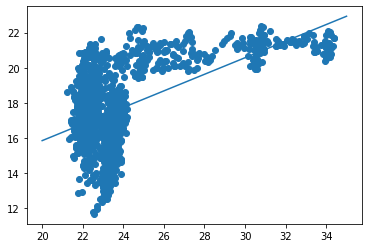

In [46]:
x = np.linspace(20, 35)
y = a * x + b
plt.figure()
plt.scatter(mv[:, 1], cv02)
plt.plot(x, y)
plt.show()
